In [1]:
#|default_exp app

In [2]:
#|export

from fastai.vision.all import *
import gradio as gr

In [3]:
#|export

learn = load_learner("/home/kyan/downloads/model.pkl")

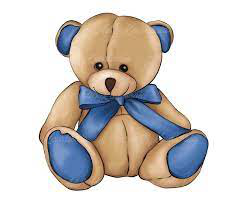

In [4]:
im = PILImage.create("/home/kyan/downloads/teddy.jpg")
im.thumbnail((256,256))
im

In [5]:
learn

In [17]:
#|export

categories = ('Brown', 'Polar', 'Teddy')

def classify_image(img):
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))

In [7]:
classify_image(im)

{'Brown': 3.7251535104587674e-05,
 'Polar': 1.201072518597357e-05,
 'Teddy': 0.9999507665634155}

In [18]:
#|export

examples = ["/home/kyan/downloads/teddy.jpg", "/home/kyan/downloads/brown.jpg",  "/home/kyan/downloads/polar.jpg"]

# inputs = gr.Image(width=192, height=192)
# outputs = gr.outputs.Label()
title = "Bear Classifier"
description = "Can classify bears as either teddies, polar or brown. Created witht the help of fast.ai as a demonstration of my capabilities"


interface = gr.Interface(fn=classify_image,
                         inputs="image",
                         outputs="label",
                         title=title,
                         description=description,
                         examples=examples).launch()


Running on local URL:  http://127.0.0.1:7866

To create a public link, set `share=True` in `launch()`.


In [ ]:
from nbdev.export import nb_export
nb_export('02-exercise-deployment.ipynb', ".")